Question 1: - Write a program that takes a string as input, and counts the frequency of each word in the string, there might be repeated characters in the string. Your task is to find the highest frequency and returns the length of the highest-frequency word. Note - You have to write at least 2 additional test cases in which your program will run successfully and provide an explanation for the same. Example input - string = “write write write all the number from from from 1 to 100” Example output - 5 Explanation - From the given string we can note that the most frequent words are “write” and “from” and the maximum value of both the values is “write” and its corresponding length is 5

In [1]:
def get_highest_frequency_word_length(string):
    #Split the string into words
    words = string.split()
    #Count the frequency of each word
    word_counts={}
    for word in words:
        word_counts[word]=word_counts.get(word, 0) + 1
        
    #Find the word with highest frequency
    highest_frequency = 0
    highest_frequency_word_length = 0
    for word,count in word_counts.items():
        if count > highest_frequency:
            highest_frequency = count
            highest_frequency_word_length = len(word)
        
    return highest_frequency_word_length

In [2]:
string = "write write write all the number from from from 1 to 100"
result = get_highest_frequency_word_length(string)
print(result)

5


In [3]:
#Test Case : 1
string = "I am am the queen, am I"
result = get_highest_frequency_word_length(string)
print(result)

2


In [ ]:
#In this case "am" word has the highest frequency and the length of word "am" is 2

In [4]:
#Test Case : 2
string = "apple banana papaya papaya papaya apple"
result = get_highest_frequency_word_length(string)
print(result)

6


In [ ]:
#In this case "papaya" word has the highest frequency and the length of word "papaya" is 6.

Question 2: - Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if he can remove just one character at the index in the string, and the remaining characters will occur the same number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO . Note - You have to write at least 2 additional test cases in which your program will run successfully and provide an explanation for the same. Example input 1 - s = “abc”. This is a valid string because frequencies are { “a”: 1, “b”: 1, “c”: 1 } Example output 1- YES Example input 2 - s “abcc”. This string is not valid as we can remove only 1 occurrence of “c”. That leaves character frequencies of { “a”: 1, “b”: 1 , “c”: 2 } Example output 2 - NO

In [6]:
from collections import Counter

def is_valid_string(s):
    #Count the frequency of each Character
    char_counts = Counter(s)
    
    #Get the frequencies of the characters
    frequencies =  list(char_counts.values())
    
    #Check if all frequencies are the same
    if len(set(frequencies))==1:
        return "YES"
    
    #Check if removing one character can make all frequencies the same
    for char,count in char_counts.items():
        if count > 1:
            char_counts[char]-=1
            updated_frequencies =  list(char_counts.values())
            if len(set(updated_frequencies))==1:
                return "YES"
            char_counts[char] += 1
            
    return "NO"

In [7]:
#TEst Case :1
s1= "xyyz"
result = is_valid_string(s1)
print(result)

YES


#In this case ,the string "xyyz" is valid because the character frequencies are {"x":1,"y":2,"z":1}.All characters have same frequency except for character "y".If we remove one occurence of "y", the remaining characters will have {"x:1,"y":1,"z":1} which is valid.We cana chieve thius by removing the first occurence of "y" at index 1.Therefore, the output will be "YES

In [8]:
#Test case :2
s2 = "aabbcc"
result = is_valid_string(s2)
print(result)

YES


#In this case the string "aabbcc" has frequenciy {"a":2,"b":2,"c":2}.All characters appear the same number of times,so the string is valid.We donot need to remove characters to make the frequencies equal.Hence,output is "YES".

Question 3: - Write a program, which would download the data from the provided link, and then read the data and convert that into properly structured data and return it in Excel format. Note - Write comments wherever necessary explaining the code written.

Link - https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json Data Attributes - id: Identification Number - int num: Number of the ● Pokémon in the official Pokédex - int name: Pokémon name - ● string img: URL to an image of this Pokémon - string type: ● Pokémon type -string height: Pokémon height - float ● weight: Pokémon weight - float candy: type of candy used to evolve Pokémon or given ● when transferred - string candy_count: the amount of candies required to evolve

int ● egg: Number of kilometers to travel to hatch the egg - float spawn_chance: ● Percentage of spawn chance (NEW) - float avg_spawns: Number of this pokemon on 10.000 spawns (NEW) - int ● spawn_time: Spawns most active at the time on this field. Spawn times are the same for all time zones and are expressed in local time. (NEW) - “minutes: seconds” multipliers: Multiplier of Combat Power (CP) for calculating the CP after evolution See below - list of int weakness: Types of ● Pokémon this Pokémon is weak to - list of strings next_evolution: Number and Name of successive evolutions of Pokémon - list of dict prev_evolution: Number and Name of previous evolutions of Pokémon - - list of dict

In [1]:
import pandas as pd
import requests

def download_data(url):
    response = requests.get(url)
    data = response.json()
    return data
    
def process_data(data):
    processed_data = []
    for pokemon in data["pokemon"]:
        processed_pokemon = {
            "id": pokemon["id"],
            "num": pokemon["num"],
            "name": pokemon["name"],
            "img": pokemon["img"],
            "type": ", ".join(pokemon["type"]),
            "height": pokemon["height"],
            "weight": pokemon["weight"],
            "candy": pokemon.get("candy", ""),
            "candy_count": pokemon.get("candy_count", ""),
            "egg": pokemon.get("egg", ""),
            "spawn_chance": pokemon.get("spawn_chance", ""),
            "avg_spawns": pokemon.get("avg_spawns", ""),
            "spawn_time": pokemon.get("spawn_time", ""),
            #"multipliers": ", ".join(map(str, pokemon.get("multipliers", []))),
            "weakness": ", ".join(pokemon.get("weaknesses", [])),
            "next_evolution": ", ".join(
                [evolution.get("num", "") + " - " + evolution.get("name", "") for evolution in pokemon.get("next_evolution", [])]
            ),
            "prev_evolution": ", ".join(
                [evolution.get("num", "") + " - " + evolution.get("name", "") for evolution in pokemon.get("prev_evolution", [])]
            ),
        }
        processed_data.append(processed_pokemon)
    return processed_data

def convert_to_csv(data,filename):
    df = pd.DataFrame(data)
    df.to_excel(filename, index =False)
    
def save_as_excel(data, output_file):
    df = pd.DataFrame(data)
    df.to_excel(output_file, index=False)
    print("Excel file created successfully.")
    
    
#Provide the URL for data download
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
#Specify the output excel file name
output_file = "pokemon_data.xlsx"

#Download the data from provided link
data = download_data(url)

#Process the data into structured format
processed_data = process_data(data)

#convert the processed data to Excel format and save it
save_as_excel(processed_data, output_file)


Excel file created successfully.


In [ ]:
Question 4 -
Write a program to download the data from the link given below and then read the data and convert the into
the proper structure and return it as a CSV file.
Link - https://data.nasa.gov/resource/y77d-th95.json
Note - Write code comments wherever needed for code understanding.

Sample data -
{
    "name" : "Tomakovka",
    "id" : 24019,
    "nametype" : "valid",
    "recclass": "LL6",
    "mass" : 600,
    "fall" : "Fell",
    "year" : "1905-01-01T00:00:00.0000"
    "reclat": "47.850000",
    "reclong": "34.766670",
    "geolocation" : {
        "type" : "Point",
        "coordinates": [
            34.76667,
            47.85
        ]
    }
}



In [19]:
import requests
import pandas as pd

def download_data(url):
    response = requests.get(url)
    data = response.json()
    return data

def process_data(data):
    processed_data = []
    for entry in data:
        processed_entry= {
                "name": entry.get("name", ""),
                "id": entry.get("id", ""),
                "nametype": entry.get("nametype", ""),
                "recclass": entry.get("recclass", ""),
                "mass": entry.get("mass", ""),
                "fall": entry.get("fall", ""),
                "year": entry.get("year", ""),
                "reclat": entry.get("reclat", ""),
                "reclong": entry.get("reclong", "")
            }
        processed_data.append(processed_entry)
    return processed_data

def convert_to_csv(data,filename):
    df = pd.DataFrame(data)
    df.to_csv(filename, index =False)
    
#Provide the URL for data download
url = 'https://data.nasa.gov/resource/y77d-th95.json'

#Specify the output csv file name
output_filename = 'meteorite_data.csv'

#Download the data from provided link
data = download_data(url)

#Process the data into structured format
processed_data = process_data(data)

#convert the processed data to CSV format and save it
convert_to_csv(processed_data, output_filename)

print('Data has been successfully downloaded and converted to CSV format')

Data has been successfully downloaded and converted to CSV format


Question:5
Write a program to download the data from the given API link and then extract the following data with
proper formatting
Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes
Note - Write proper code comments wherever needed for the code understanding

Sample data :
    {
        "id" : 2326658,
        "url": "https://www.tvmaze.com/episodes/2326658/westworld-4x05-zhuangzi",
        "name":"Zhunangzi",
        "season": 4,
        "number":5,
        "type":"regular",
        "airdate":"2022-07-24",
        "airtime":"21:00",
        "airstamp": "2022-07-25T01:00:00+00:00",
        "runtime":60,
        "rating":{
            "average":  7.8,
            },
        "image":{
            "medium":"https://static.tvmaze.com/uploads/images/medium_landscape/416/1042460.jpg",
            "original":"https://static.tvmaze.com/uploads/images/original_untouched/416/1042460.jpg"
        },
        "summary":<p>God is bored </p>,
        "_links":{
            "self": {
                "href":"https://api.tvmaze.com/episodes/2326658"
            },
            "show":{
                "href":"https://api.tvmaze.com/shows/1371"
            }
        }
        
    }
    
Excepted Output Data Attributes -
● id - int url - string
● name - string season
● - int number - int
● type - string airdate -
● date format airtime -
● 12-hour time format
● runtime - float
● average rating - float
● summary - string
● without html tags
● medium image link - string
● Original image link - string

In [37]:
import requests

# API URL
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Send GET request to the API
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    
    # Extract the required attributes from the data
    episode_id = data['id']
    episode_url = data['url']
    episode_name = data['name']
    season = data["season"]
    episode_number = data.get("number", "")
    episode_type = data['type']
    airdate = data.get("airdate", "")
    airtime = data.get("airtime", "")
    runtime = data['runtime']
    average_rating = data['rating']['average']
    summary = data['summary']
    image_medium = data['image']['medium']
    image_original = data['image']['original']
    
    # Remove HTML tags from the summary
    summary = summary.replace('<p>', '').replace('</p>', '')
    
    # Print the extracted data with proper formatting
    print("Episode ID:", episode_id)
    print("Episode URL:", episode_url)
    print("Episode Name:", episode_name)
    print("Season:", season)
    print("Episode Number:", episode_number)
    print("Type:", episode_type)
    print("Airdate:", airdate)
    print("Airtime:", airtime)
    print("Runtime:", runtime)
    print("Average Rating:", average_rating)
    print("Summary:", summary)
    print("Medium Image Link:", image_medium)
    print("Original Image Link:", image_original)
else:
    print("Failed to retrieve data. Error:", response.status_code)





KeyError: 'season'

In [ ]:
Question 6 -
Using the data from Question 3 , write code to analyze the data and answer the following questions Note 1.
Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all Pokemons whose spawn rate is less than 5%
● Get all Pokemons that have less than 4 weaknesses
● Get all Pokemons that have no multipliers at all
● Get all Pokemons that do not have more than 2 evolutions
● Get all Pokemons whose spawn time is less than 300 seconds.
Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
● Get all Pokemon who have more than two types of capabilities

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#Read the excel file
url= r"C:\Users\aru78\INEURON DATA\EDA Collection\pokemon_data.xlsx"
df = pd.read_excel(url)
df.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,weakness,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,"Fire, Ice, Flying, Psychic","002 - Ivysaur, 003 - Venusaur",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"Fire, Ice, Flying, Psychic",003 - Venusaur,001 - Bulbasaur
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.017,1.7,11:30,"Fire, Ice, Flying, Psychic",NaN,"001 - Bulbasaur, 002 - Ivysaur"
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.253,25.3,08:45,"Water, Ground, Rock","005 - Charmeleon, 006 - Charizard",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.012,1.2,19:00,"Water, Ground, Rock",006 - Charizard,004 - Charmander


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              151 non-null    int64  
 1   num             151 non-null    int64  
 2   name            151 non-null    object 
 3   img             151 non-null    object 
 4   type            151 non-null    object 
 5   height          151 non-null    object 
 6   weight          151 non-null    object 
 7   candy           151 non-null    object 
 8   candy_count     70 non-null     float64
 9   egg             151 non-null    object 
 10  spawn_chance    151 non-null    float64
 11  avg_spawns      151 non-null    float64
 12  spawn_time      145 non-null    object 
 13  weakness        151 non-null    object 
 14  next_evolution  70 non-null     object 
 15  prev_evolution  72 non-null     object 
dtypes: float64(3), int64(2), object(11)
memory usage: 19.0+ KB


In [3]:
df.isnull().sum()

id                 0
num                0
name               0
img                0
type               0
height             0
weight             0
candy              0
candy_count       81
egg                0
spawn_chance       0
avg_spawns         0
spawn_time         6
weakness           0
next_evolution    81
prev_evolution    79
dtype: int64

In [9]:
#Missing values Found in candy_count,next_evolution/prev_evolution

In [4]:
df.duplicated().sum()

0

In [5]:
#No duplicated values Found

In [6]:
#Making shallow copy of the datset
df_copy = df.copy()

In [7]:
#Get all Pokemons whose spawn rate is less than 5%
spawn_rate_threshold = 5
less_spawn_rate_pokemon = df_copy[df_copy["spawn_chance"] < spawn_rate_threshold]

In [12]:
less_spawn_rate_pokemon

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,weakness,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,69.00,20:00,"Fire, Ice, Flying, Psychic","002 - Ivysaur, 003 - Venusaur",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,07:00,"Fire, Ice, Flying, Psychic",003 - Venusaur,001 - Bulbasaur
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,"Fire, Ice, Flying, Psychic",NaN,"001 - Bulbasaur, 002 - Ivysaur"
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,"Water, Ground, Rock","005 - Charmeleon, 006 - Charizard",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,"Water, Ground, Rock",006 - Charizard,004 - Charmander
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,Dragon,1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,06:41,"Ice, Dragon, Fairy","148 - Dragonair, 149 - Dragonite",NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,Dragon,3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,"Ice, Dragon, Fairy",149 - Dragonite,147 - Dratini
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"Dragon, Flying",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,"Ice, Rock, Dragon, Fairy",NaN,"147 - Dratini, 148 - Dragonair"
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,"Bug, Ghost, Dark",NaN,NaN


In [ ]:
#It can be seen that there are 147 records from the dataset whose spawn rate is less than 5

### Get all Pokemons that have less than 4 weaknesses:

In [8]:
#Get all Pokemons that have less than 4 weaknesses:
max_weakness = 4
less_weakness_pokemon = df_copy[df_copy["weakness"].apply(len) < max_weakness]

In [9]:
less_weakness_pokemon

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,weakness,next_evolution,prev_evolution


In [18]:
#It can be seen no records found for the Pokemons whose weakness is less than 4

### Get all Pokemons whose spawn time is less than 300 seconds:

In [10]:
spawn_time_threshold = "00:05:00"
df["spawn_time"] = pd.to_datetime(df["spawn_time"], format="%H:%M:%S")
less_spawn_time_pokemon = df[df["spawn_time"].dt.second < 300]

In [23]:
less_spawn_time_pokemon

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,weakness,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,69.00,1900-01-01 20:00:00,"Fire, Ice, Flying, Psychic","002 - Ivysaur, 003 - Venusaur",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,1900-01-01 07:00:00,"Fire, Ice, Flying, Psychic",003 - Venusaur,001 - Bulbasaur
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,1900-01-01 11:30:00,"Fire, Ice, Flying, Psychic",NaN,"001 - Bulbasaur, 002 - Ivysaur"
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,1900-01-01 08:45:00,"Water, Ground, Rock","005 - Charmeleon, 006 - Charizard",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,1900-01-01 19:00:00,"Water, Ground, Rock",006 - Charizard,004 - Charmander
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,142,142,Aerodactyl,http://www.serebii.net/pokemongo/pokemon/142.png,"Rock, Flying",1.80 m,59.0 kg,None,NaN,10 km,0.0180,1.80,1900-01-01 23:40:00,"Water, Electric, Ice, Rock, Steel",NaN,NaN
142,143,143,Snorlax,http://www.serebii.net/pokemongo/pokemon/143.png,Normal,2.11 m,460.0 kg,None,NaN,10 km,0.0160,1.60,1900-01-01 23:40:00,Fighting,NaN,NaN
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,Dragon,1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,1900-01-01 06:41:00,"Ice, Dragon, Fairy","148 - Dragonair, 149 - Dragonite",NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,Dragon,3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,1900-01-01 11:57:00,"Ice, Dragon, Fairy",149 - Dragonite,147 - Dratini


In [ ]:
#It can be seen 145 records in data has spawn time less than 300

### Get all Pokemon who have more than two types of capabilities:

In [11]:
min_capabilities = 2
more_capabilities_pokemon = df[df["type"].apply(len) > min_capabilities]

In [25]:
more_capabilities_pokemon

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,weakness,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,69.00,1900-01-01 20:00:00,"Fire, Ice, Flying, Psychic","002 - Ivysaur, 003 - Venusaur",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,1900-01-01 07:00:00,"Fire, Ice, Flying, Psychic",003 - Venusaur,001 - Bulbasaur
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,1900-01-01 11:30:00,"Fire, Ice, Flying, Psychic",NaN,"001 - Bulbasaur, 002 - Ivysaur"
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,1900-01-01 08:45:00,"Water, Ground, Rock","005 - Charmeleon, 006 - Charizard",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,1900-01-01 19:00:00,"Water, Ground, Rock",006 - Charizard,004 - Charmander
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,Dragon,1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,1900-01-01 06:41:00,"Ice, Dragon, Fairy","148 - Dragonair, 149 - Dragonite",NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,Dragon,3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,1900-01-01 11:57:00,"Ice, Dragon, Fairy",149 - Dragonite,147 - Dratini
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"Dragon, Flying",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,1900-01-01 23:38:00,"Ice, Rock, Dragon, Fairy",NaN,"147 - Dratini, 148 - Dragonair"
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaT,"Bug, Ghost, Dark",NaN,NaN


In [ ]:
#It can be seen that 151 records in the data has more tahn two types of capabilities

In [13]:
df_copy["height"]=df_copy["height"].str.replace("m","")
df_copy["weight"]=df_copy["weight"].str.replace("kg","")

In [14]:
df_copy["height"]=df_copy["height"].astype("float")
df_copy["weight"]=df_copy["weight"].astype("float")

In [16]:
#Segreggate numerical and categorical features
numerical_columns = df_copy.columns[df_copy.dtypes!='object']
categorical_columns = df_copy.columns[df_copy.dtypes=='object']
print(f"Numerical Columns : {numerical_columns} ")
print(f"Categorical Columns : {categorical_columns} ")

Numerical Columns : Index(['id', 'num', 'height', 'weight', 'candy_count', 'spawn_chance',
       'avg_spawns'],
      dtype='object') 
Categorical Columns : Index(['name', 'img', 'type', 'candy', 'egg', 'spawn_time', 'weakness',
       'next_evolution', 'prev_evolution'],
      dtype='object') 


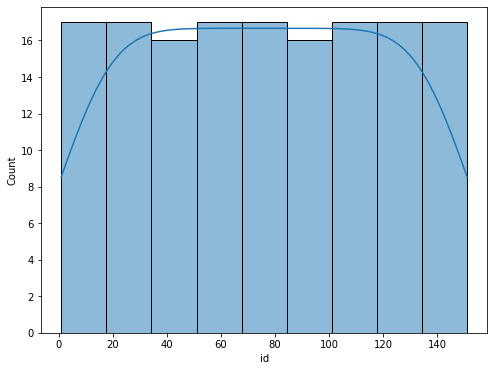

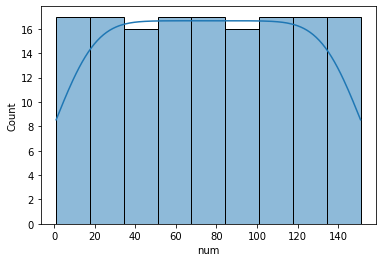

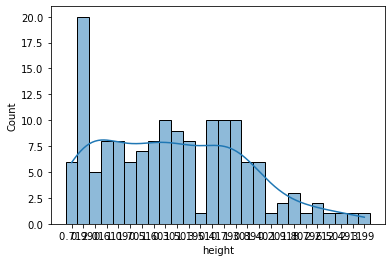

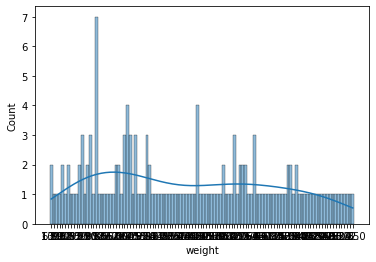

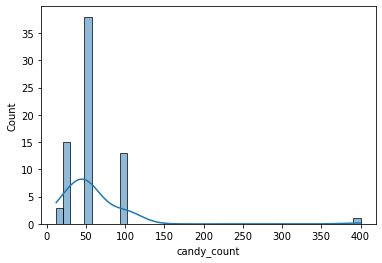

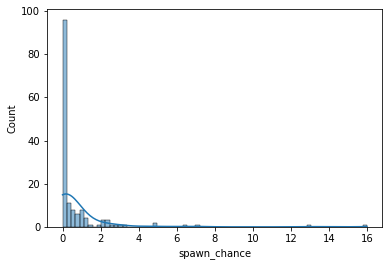

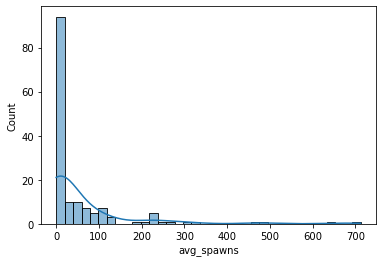

In [17]:
#Lets Plot some graphs of numerical features
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=1
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print("\n")
    plt.show()

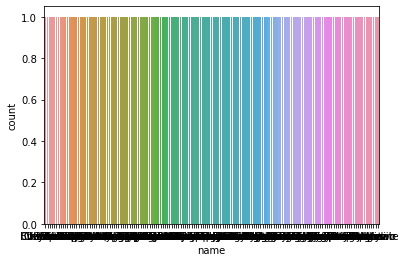

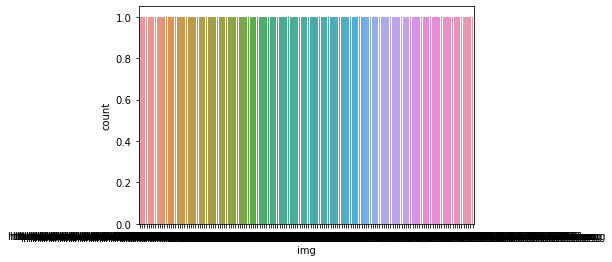

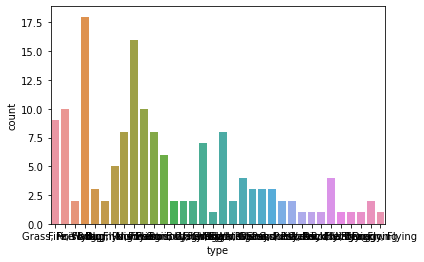

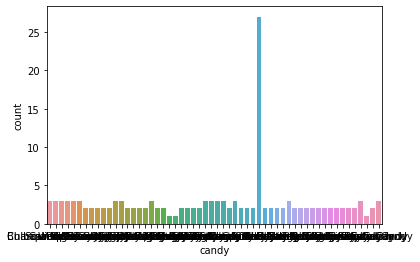

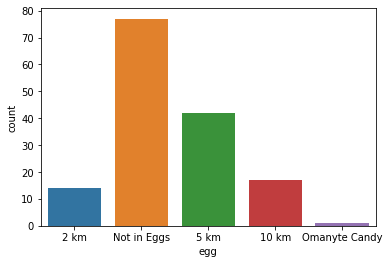

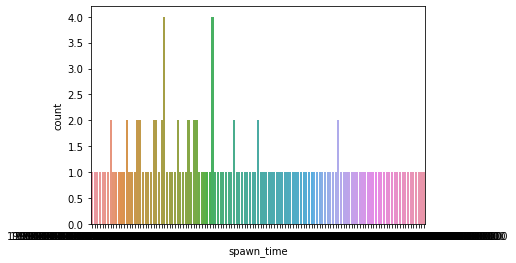

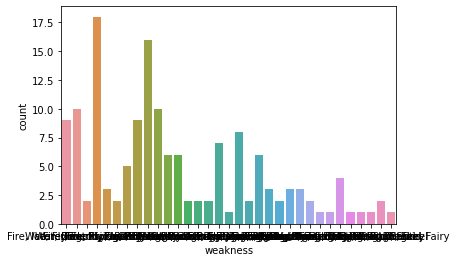

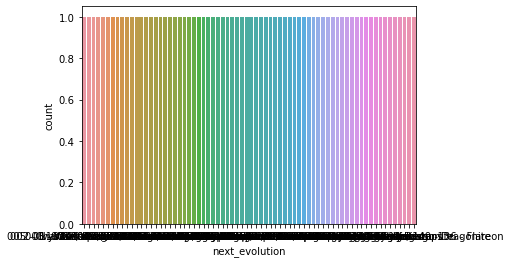

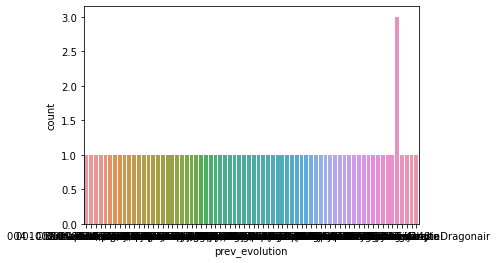

In [18]:
#Plot graph for Categorical variables
x=1
for i in categorical_columns:
    sns.countplot(data=df , x=i)
    print('\n')
    plt.show()

Question 7 -
Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all the Earth meteorites that fell before the year 2000
● Get all the earth meteorites co-ordinates who fell before the year 1970
● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#Read the excel file
url= r"C:\Users\aru78\INEURON DATA\EDA Collection\meteorite_data.csv"
df = pd.read_csv(url)
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01T00:00:00.000,56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01T00:00:00.000,16.88333,-99.90000
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01T00:00:00.000,-33.16667,-64.95000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      1000 non-null   object 
 1   id        1000 non-null   int64  
 2   nametype  1000 non-null   object 
 3   recclass  1000 non-null   object 
 4   mass      972 non-null    float64
 5   fall      1000 non-null   object 
 6   year      999 non-null    object 
 7   reclat    988 non-null    float64
 8   reclong   988 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 70.4+ KB


In [4]:
df.isnull().sum()

name         0
id           0
nametype     0
recclass     0
mass        28
fall         0
year         1
reclat      12
reclong     12
dtype: int64

In [5]:
#we have mkssing values in the dataset

In [6]:
df.duplicated().sum()

0

In [7]:
#No duplicate values in data

In [4]:
df_copy=df.copy()

### Get all the Earth meteorites that fell before the year 2000:

In [5]:
#Converting the 'year' column to datetime type
df_copy['year']=pd.to_datetime(df_copy['year'],errors = 'coerce')

In [6]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   name      1000 non-null   object        
 1   id        1000 non-null   int64         
 2   nametype  1000 non-null   object        
 3   recclass  1000 non-null   object        
 4   mass      972 non-null    float64       
 5   fall      1000 non-null   object        
 6   year      982 non-null    datetime64[ns]
 7   reclat    988 non-null    float64       
 8   reclong   988 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 70.4+ KB


In [7]:
#Filter earth meteorites that fall before the year 2000
earth_meteorites_before_2000 = df_copy[(df_copy['fall']=='Fell') & (df_copy['year'].dt.year < 2000)]

In [8]:
earth_meteorites_before_2000 

,name,id,nametype,recclass,mass,fall,year,reclat,reclong
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01,50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01,56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01,16.88333,-99.90000
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01,-33.16667,-64.95000
...,...,...,...,...,...,...,...,...,...
994,Timochin,24004,Valid,H5,65500.0,Fell,1807-01-01,54.50000,35.20000
995,Tirupati,24009,Valid,H6,230.0,Fell,1934-01-01,13.63333,79.41667
997,Tjabe,24011,Valid,H6,20000.0,Fell,1869-01-01,-7.08333,111.53333
998,Tjerebon,24012,Valid,L5,16500.0,Fell,1922-01-01,-6.66667,106.58333


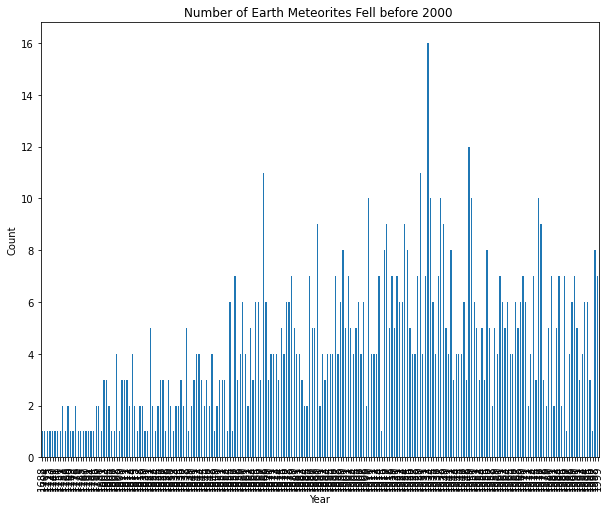

In [10]:
#Plot the count of Earth meteorites fell before 2000 by year
earth_meteorites_before_2000['year'].dt.year.value_counts().sort_index().plot(kind='bar',figsize=(10,8))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Earth Meteorites Fell before 2000 ')
plt.show()

Observations : The plot shows the number of Earth meteorites that fell before the year 2000.Each bar represents a year and the height of bar indicates the count of meteorites that fell in that year

### Get all the earth meteorites coordinates that fell before the year 1970:

In [11]:
#Filter Earth meteorites coordinates that fell before the year 1970
earth_meteorites_coordinates_before_1970 = df_copy[(df_copy['fall']=='Fell') & (df_copy['year'].dt.year < 1970)]

In [12]:
earth_meteorites_coordinates_before_1970

,name,id,nametype,recclass,mass,fall,year,reclat,reclong
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01,50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01,56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01,-33.16667,-64.95000
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,1919-01-01,32.10000,71.80000
...,...,...,...,...,...,...,...,...,...
994,Timochin,24004,Valid,H5,65500.0,Fell,1807-01-01,54.50000,35.20000
995,Tirupati,24009,Valid,H6,230.0,Fell,1934-01-01,13.63333,79.41667
997,Tjabe,24011,Valid,H6,20000.0,Fell,1869-01-01,-7.08333,111.53333
998,Tjerebon,24012,Valid,L5,16500.0,Fell,1922-01-01,-6.66667,106.58333


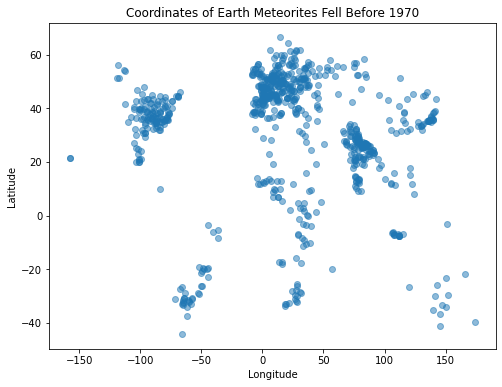

In [13]:
#Scatter plot of Earth meteorites coordinates fell before 1970
plt.figure(figsize=(8,6))
plt.scatter(earth_meteorites_coordinates_before_1970['reclong'], earth_meteorites_coordinates_before_1970['reclat'], alpha =0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Coordinates of Earth Meteorites Fell Before 1970')
plt.show()

Observations: #Scatter plot displays the coordinates (longitude and latitude) of Earth meteorites that fell before the year 1970.Each point represents a meteorite, and its position on the plot represents its geographical ccordinates

### Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg:

In [15]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   name      1000 non-null   object        
 1   id        1000 non-null   int64         
 2   nametype  1000 non-null   object        
 3   recclass  1000 non-null   object        
 4   mass      972 non-null    float64       
 5   fall      1000 non-null   object        
 6   year      982 non-null    datetime64[ns]
 7   reclat    988 non-null    float64       
 8   reclong   988 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 70.4+ KB


In [18]:
df_copy.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01,50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01,56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01,16.88333,-99.90000
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01,-33.16667,-64.95000


In [23]:
#filter data whose mass was more than 10000kg
mass_threshold = 10000
earth_meteorites_gt_10000kg = df_copy[df_copy['mass'] > mass_threshold * 1000]



In [24]:
earth_meteorites_gt_10000kg

,name,id,nametype,recclass,mass,fall,year,reclat,reclong
920,Sikhote-Alin,23593,Valid,"Iron, IIAB",23000000.0,Fell,1947-01-01,46.16,134.65333


In [ ]:
#It is found only one record has mass greater than 10000

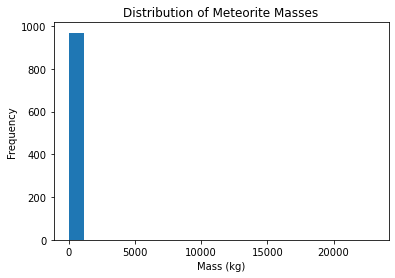

In [26]:
# Plotting the distribution of meteorite masses
plt.hist(df['mass'].astype(float) / 1000, bins=20)
plt.xlabel('Mass (kg)')
plt.ylabel('Frequency')
plt.title('Distribution of Meteorite Masses')
plt.show()

Question 9 -
Write a program to read the data from the following link, perform data analysis and answer the following
questions
Note -
1. Write code comments wherever required for code understanding
Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
Insights to be drawn -
● Get all the cars and their types that do not qualify for clean alternative fuel vehicle
● Get all TESLA cars with the model year, and model type made in Bothell City.
● Get all the cars that have an electric range of more than 100, and were made after
2015
● Draw plots to show the distribution between city and electric vehicle type

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
data_url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(data_url)
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [2]:
df.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
130438,7SAYGDEE6P,Pierce,Gig Harbor,WA,98335.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,26.0,231134102,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
130439,1N4BZ1CV7N,Pierce,Tacoma,WA,98408.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,29.0,185810943,POINT (-122.43810499999995 47.203220000000044),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
130440,5YJYGDEE8M,King,Seattle,WA,98109.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,36.0,176542418,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
130441,5YJXCBE22L,Island,Camano Island,WA,98282.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293,0,10.0,102834938,POINT (-122.40049 48.23986),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.302997e+10
130442,5YJ3E1EA5M,Pierce,Puyallup,WA,98375.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,2.0,180473639,POINT (-122.30116 47.1165),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130443 entries, 0 to 130442
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         130443 non-null  object 
 1   County                                             130440 non-null  object 
 2   City                                               130440 non-null  object 
 3   State                                              130443 non-null  object 
 4   Postal Code                                        130440 non-null  float64
 5   Model Year                                         130443 non-null  int64  
 6   Make                                               130443 non-null  object 
 7   Model                                              130221 non-null  object 
 8   Electric Vehicle Type                              130443 non-null  object

In [4]:
# Get all TESLA cars with the model year, and model type made in Bothell City
tesla_bothell = df.loc[(df['Make'] == 'TESLA') & (df['City'] == 'Bothell')]

In [5]:
tesla_bothell_info = tesla_bothell[['Model Year', 'Model']]

In [6]:
print("TESLA cars with the model year and model type made in Bothell City:")
tesla_bothell_info

TESLA cars with the model year and model type made in Bothell City:


,Model Year,Model
39,2020,MODEL 3
217,2022,MODEL 3
218,2022,MODEL Y
222,2018,MODEL 3
292,2017,MODEL X
...,...,...
129778,2019,MODEL 3
129954,2021,MODEL 3
129976,2014,MODEL S
130295,2022,MODEL 3


In [10]:
### Get all the cars that have an electric range of more than 100, and were made after 2015
electric_cars_100plus_range = df.loc[(df['Electric Range'] > 100) & (df['Model Year'] > 2015)]

In [15]:
electric_cars_100plus_range_info = electric_cars_100plus_range[['Make', 'Model']]

In [16]:
electric_cars_100plus_range_info

,Make,Model
0,TESLA,MODEL X
2,TESLA,MODEL 3
4,TESLA,MODEL S
12,TESLA,MODEL 3
13,TESLA,MODEL 3
...,...,...
130417,TESLA,MODEL Y
130428,NISSAN,LEAF
130432,TESLA,MODEL Y
130436,TESLA,MODEL 3


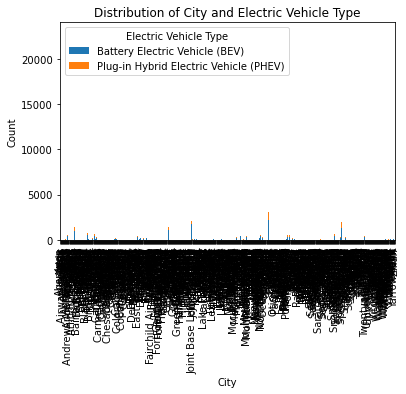

In [58]:
# Draw plots to show the distribution between city and electric vehicle type
city_ev_type_counts = df.groupby(['City', 'Electric Vehicle Type']).size().unstack()
city_ev_type_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of City and Electric Vehicle Type')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

Question 10 -
Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or
paragraph, and return their respective count as a dictionary.
Note -
1. Write code comments wherever required for code
2. You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.

Example Output :

dic = {
"nouns" : "count of nouns",
"pronouns" :"count of pronouns",
"verbs": "count of verbs",
"adjectives" : "count of adjectives"
}